In [19]:
!pip install tensorflow
!pip install scikit-learn 
!pip install matplotlib

In [20]:
!pip install opencv-python
!pip install pandas

In [21]:
!pip install tensorflow-gpu

In [22]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import cv2

In [23]:
physical_devices = tf.config.list_physical_devices("GPU")
tf.config.experimental.set_memory_growth(physical_devices[0],True)


In [24]:
train = ImageDataGenerator(rescale=1/255)
test = ImageDataGenerator(rescale=1/255)

In [25]:
train_dataset = train.flow_from_directory('.',
                                          classes=['train_img']
                                         )
test_dataset = test.flow_from_directory('.',
                                          classes=['test_img']
                                         )

Found 245 images belonging to 1 classes.
Found 35 images belonging to 1 classes.


In [26]:
filenames = train_dataset.filenames

In [27]:
train_images=[]
from PIL import Image
for i in filenames:
    #img = np.asarray(Image.open(i).convert('L'))
    img = np.asarray(Image.open(i))
    train_images.append(img)
train_images = np.array(train_images)

In [28]:
print(train_images[2].shape)

(416, 416, 3)


In [29]:
# print(train_images[2])

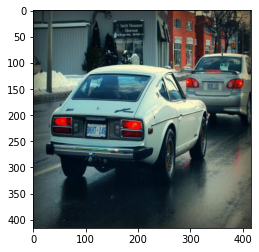

In [30]:
plt.imshow(train_images[2])

In [31]:
# lines = open('train-target.csv').readlines()[1:]
# n=0
# coords=[]
# for line in lines:
#     n+=1
#     if((n%2)==1):
#         coords.append(line.split(','))
        

# print(coords[:][4:])

# df = pd.read_csv('train-target.csv')
# target_cols = df.columns.tolist()[4:]
# x_min = df[target_cols[0]].values
# y_min = df[target_cols[1]].values
# x_max = df[target_cols[2]].values
# y_max = df[target_cols[3]].values
# size = len(x_min)

In [32]:
df = pd.read_csv('train-target.csv')
df = df[df['class']=='license-plate']


In [33]:
df['class'] = 1
df.head()

,filename,width,height,class,xmin,ymin,xmax,ymax
0,944281d0485869f0_jpg.rf.e5e018531362887fed53a1...,416,416,1,169,255,259,341
2,b01d46f9911d558b_jpg.rf.e173ce2e74a946f5d7699f...,416,416,1,164,132,256,224
4,3ed000628c6a0587_jpg.rf.ee04a5eaab345281520634...,416,416,1,173,220,219,258
6,1f0e643b125f00ec_jpg.rf.e24a4bdd168a8b7bc4da45...,416,416,1,297,277,333,310
11,28e26a4eb646c67a_jpg.rf.ebc297ef09ec5a7f8dcb0d...,416,416,1,185,229,264,269


In [34]:
x_min = df['xmin'].values
y_min = df['ymin'].values
x_max = df['xmax'].values
y_max = df['ymax'].values
labels = df['class'].values
size = len(x_min)


In [35]:
train_target = []

train_labels=labels.reshape(-1,1)
train_labels = np.array(train_labels)[:245]
print("train_labels shape:",train_labels.shape)
for i in range(size):
    train_target.append((x_min[i],y_min[i],x_max[i],y_max[i]))

train_target = np.array(train_target)[:245]

print("train target shape:",train_target.shape)

train_labels shape: (245, 1)
train target shape: (245, 4)


In [36]:
print(train_target[1])

[164 132 256 224]


In [37]:
filenames1 = test_dataset.filenames

In [38]:
df = pd.read_csv('test-target.csv')
df = df[df['class']=='license-plate']
df['class'] = 1
df.head()

,filename,width,height,class,xmin,ymin,xmax,ymax
0,ccc1a2d44a290368_jpg.rf.8e8d6f87f1d1327caf5f80...,416,416,1,210,256,264,298
3,b6580dec5ada277d_jpg.rf.3ec17c0d68df1e6818d590...,416,416,1,92,184,176,259
5,b1a50a3824887ee2_jpg.rf.68a4fd34fce20184287592...,416,416,1,156,319,233,366
6,b1a50a3824887ee2_jpg.rf.68a4fd34fce20184287592...,416,416,1,221,95,224,100
10,b91c3aaba25bf914_jpg.rf.1f03184f0c412a59b83c40...,416,416,1,111,276,174,300


In [39]:
test_images=[]
from PIL import Image
for i in filenames1:
    #img = np.asarray(Image.open(i).convert('L'))
    img = np.asarray(Image.open(i))
    test_images.append(img)
test_images = np.array(test_images)

In [40]:
print(test_images[3].shape)

(416, 416, 3)


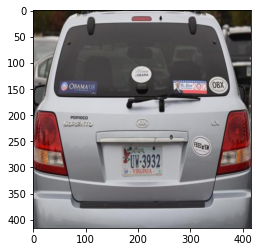

In [41]:
plt.imshow(test_images[3])

In [42]:
# lines = open('test-target.csv').readlines()[1:]
# n=0
# coords=[]
# for line in lines:
#     n+=1
#     if((n%2)==1):
#         coords.append(line.split(','))
            
# print(coords[2][4:])

In [43]:
x_min = df['xmin'].values
y_min = df['ymin'].values
x_max = df['xmax'].values
y_max = df['ymax'].values
labels = df['class'].values
size = len(x_min)

In [44]:
# x_min = [e[4] for e in coords]
# y_min = [e[5] for e in coords]
# x_max = [e[6] for e in coords]
# y_max = [e[7].strip() for e in coords]
# labels = [e[3] for e in coords]

In [45]:
test_target = []
test_labels=labels.reshape(-1,1)
test_labels = np.array(test_labels)[:35]

for i in range(size):
    test_target.append((x_min[i],y_min[i],x_max[i],y_max[i]))
test_target = np.array(test_target)[:35]
print("test target shape:",test_target.shape)

test target shape: (35, 4)


In [46]:
#print(test_labels)

In [47]:
print(test_target[0])

[210 256 264 298]


In [77]:


print("train_target shape:",train_target.shape)

print("test target shape:",test_target.shape)



print("train_label shape:",train_labels.shape)

print("test label shape:",test_labels.shape)

train_target shape: (245, 4)
test target shape: (35, 4)
train_label shape: (245, 1)
test label shape: (35, 1)


In [49]:

print("train_images shape:",train_images.shape)


print("test images shape:",test_images.shape)

train_images shape: (245, 416, 416, 3)
test images shape: (35, 416, 416, 3)


In [50]:
# train_images = train_images
# print(train_images.shape)

In [51]:
# test_images = test_images
# print(test_images.shape)

In [52]:
classes = ['license-plate','vehicle']
num_classes = 2
width = 416
height = 416

In [74]:
print(train_images[0].shape)

(416, 416, 3)


In [54]:
#help(layers.Conv2D)

In [65]:
from tensorflow.keras import layers
#input layer

inputs= tf.keras.layers.Input(shape=train_images[0].shape)


#base convolution layer for chaining output of one layer to the input of next
base_layers = layers.experimental.preprocessing.Rescaling(1./255, name='bl-1')(inputs)
base_layers = layers.Conv2D(32,(3,3),strides = 2,activation='relu',name='bl-2')(base_layers)
base_layers = layers.MaxPooling2D(name='bl-3')(base_layers) #208
base_layers = layers.Conv2D(64,(3,3),strides = 2,activation='relu',name='bl-4')(base_layers)
base_layers = layers.MaxPooling2D(name='bl-5')(base_layers) #104
base_layers = layers.Conv2D(128,(3,3),strides = 2,activation='relu',name='bl-6')(base_layers)
base_layers = layers.MaxPooling2D(name='bl-7')(base_layers) #52
base_layers = layers.Conv2D(256,(3,3),strides = 2,activation='relu',name='bl-8')(base_layers)
base_layers = layers.MaxPooling2D(name='bl-9')(base_layers)#26
#base_layers = layers.Conv2D(512,(3,3),strides = 2,activation='relu',name='bl-10')(base_layers)
#base_layers = layers.MaxPooling2D(name='bl-11')(base_layers) #13
base_layers = layers.Flatten(name='bl-10')(base_layers)


#classifier layer for classification -vehicle or not(as our output for final cnn)
classifier_layer = layers.Dense(512,activation='relu',name='cl-1')(base_layers)
#takes input from flattened output of base layers to its 128 neurons
classifier_layer = layers.Dense(num_classes, name='cl-head')(classifier_layer)
#its output layer predicts based on num_classes (prob)


#localization layer for bounding box detection(as our output for final cnn)
localizaiton_layer = layers.Dense(512, activation='relu',name='ll-1')(base_layers)
#takes output of flattened bayer layer as an input
localizaiton_layer = layers.Dense(256, activation='relu',name='ll-2')(localizaiton_layer)
localizaiton_layer = layers.Dense(128, activation='relu',name='ll-3')(localizaiton_layer)
localizaiton_layer = layers.Dense(4, activation='softmax',name='ll-head')(localizaiton_layer)




#final cnn model

model = tf.keras.Model(inputs, localizaiton_layer)

In [66]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_10 (InputLayer)       [(None, 416, 416, 3)]     0         
                                                                 
 bl-1 (Rescaling)            (None, 416, 416, 3)       0         
                                                                 
 bl-2 (Conv2D)               (None, 207, 207, 32)      896       
                                                                 
 bl-3 (MaxPooling2D)         (None, 103, 103, 32)      0         
                                                                 
 bl-4 (Conv2D)               (None, 51, 51, 64)        18496     
                                                                 
 bl-5 (MaxPooling2D)         (None, 25, 25, 64)        0         
                                                                 
 bl-6 (Conv2D)               (None, 12, 12, 128)       73856 

In [67]:
losses = {
    #"cl-head":tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    "ll-head":tf.keras.losses.MSE
    
}

In [68]:
model.compile(loss=losses, optimizer = 'Adam', metrics=['accuracy'])

In [69]:
# train_images = train_images[1,]
# test_images = test_images[1,]
# print(train_images.shape)



In [70]:
trainTargets = {
    #'cl-head':train_labels ,
    'll-head':train_target
    
}

validationTargets = {
    #'cl-head':test_labels,
    'll-head':test_target
    
}



In [71]:
print(train_labels.dtype)
print(test_labels.dtype)
print(test_target.dtype)
print(train_target.dtype)

int64
int64
int64
int64


In [73]:
history = model.fit(train_images,trainTargets,
                    validation_data=(test_images,validationTargets),
                    epochs = 15,
                    shuffle=True)


Epoch 1/15
8/8 [==============================] - 2s 201ms/step - loss: 56698.3789 - accuracy: 0.6163 - val_loss: 59063.2344 - val_accuracy: 0.4857
Epoch 2/15
8/8 [==============================] - 1s 119ms/step - loss: 56698.3828 - accuracy: 0.6163 - val_loss: 59063.2344 - val_accuracy: 0.4857
Epoch 3/15
8/8 [==============================] - 1s 127ms/step - loss: 56698.3828 - accuracy: 0.6163 - val_loss: 59063.2344 - val_accuracy: 0.4857
Epoch 4/15
8/8 [==============================] - 1s 131ms/step - loss: 56698.3828 - accuracy: 0.6163 - val_loss: 59063.2344 - val_accuracy: 0.4857
Epoch 5/15
8/8 [==============================] - 1s 131ms/step - loss: 56698.3789 - accuracy: 0.6163 - val_loss: 59063.2344 - val_accuracy: 0.4857
Epoch 6/15
8/8 [==============================] - 2s 215ms/step - loss: 56698.3828 - accuracy: 0.6163 - val_loss: 59063.2344 - val_accuracy: 0.4857
Epoch 7/15
8/8 [==============================] - 2s 325ms/step - loss: 56698.3828 - accuracy: 0.6163 - val_loss

In [82]:
score = model.evaluate(test_images, test_target, verbose=0)
print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')

Test loss: 59063.234375 / Test accuracy: 0.48571428656578064


In [43]:
train_images.shape

(245, 416, 416, 3)

In [44]:
#cnn practice 
c = train_images.copy()
c.resize(245,216,216,3)
c[1,].shape

(216, 216, 3)